<a href="https://colab.research.google.com/github/andythetechnerd03/Them-Data-Science-Camp/blob/main/MAI_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import decomposition
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
pca = decomposition.PCA()

In [ ]:
def eig(A):
  eigvl, eigvt = np.linalg.eigh(A)
  idx = eigvl.argsort()[::-1] # descending order
  eigvl = eigvl[idx]
  eigvt = eigvt[idx]
  return eigvl,eigvt
A = np.array([[1,-1],[-1,2]])
evl, evt = eig(A)
A@evt[0,:],evl[0]*evt[0,:]

(array([-1.37638192,  2.22703273]), array([-1.37638192,  2.22703273]))

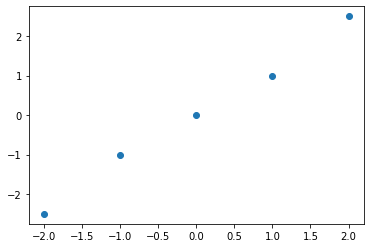

In [ ]:
# Example 0
x0 = np.array([-2,-1,0,1,2])
y0 = np.array([-2.5,-1,0,1,2.5])
n = len(x0)
X0 = np.array([x0, y0])
plt.scatter(x0,y0)

In [ ]:
pca.fit(X0)
print (pca.explained_variance_ratio_)

[1. 0.]


In [ ]:
#1/ 
X0

array([[-2. , -1. ,  0. ,  1. ,  2. ],
       [-2.5, -1. ,  0. ,  1. ,  2.5]])

In [ ]:
np.cov(X0), (1/4)*X0@X0.T

(array([[2.5  , 3.   ],
        [3.   , 3.625]]), array([[2.5  , 3.   ],
        [3.   , 3.625]]))

In [ ]:
#2/
S0 = np.cov(X0)
V0, B0 = eig(S0)
P = B0.T

In [ ]:
#3/
Y = P[:,0].T@X0
Y

array([-3.20104444, -1.40814495,  0.        ,  1.40814495,  3.20104444])

In [ ]:
# Reconstruction
X0_re = np.outer(P[:,0],P[:,0])@X0
X0_re

array([[-2.0443017 , -0.89929183,  0.        ,  0.89929183,  2.0443017 ],
       [-2.46323286, -1.08358036,  0.        ,  1.08358036,  2.46323286]])

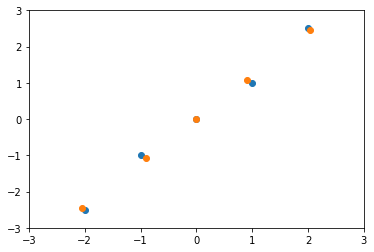

In [ ]:
plt.scatter(X0[0],X0[1])
plt.scatter(X0_re[0],X0_re[1])
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()

In [ ]:
# Cov(Y)
Y = P.T@X0
np.cov(Y), (1/4)*Y@Y.T

(array([[ 6.11477886e+00, -1.17928262e-16],
        [-1.17928262e-16,  1.02211382e-02]]),
 array([[ 6.11477886e+00, -1.17928262e-16],
        [-1.17928262e-16,  1.02211382e-02]]))

In [ ]:
pca.fit(X0)
print (pca.explained_variance_ratio_)

[1. 0.]


In [ ]:
# Example 2
y1 = np.random.uniform(-1,1,300)
e = np.random.normal(2,0.5,300)
y2 = 2*y1 + e
X2 = np.array([y1, y2])

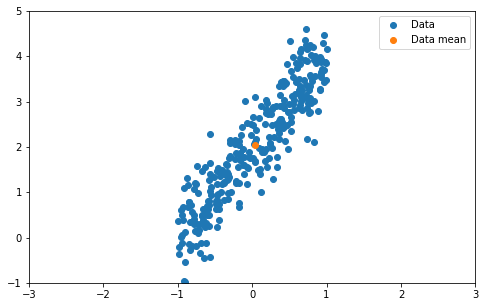

In [ ]:
m = np.mean(X2, axis = 1)
plt.figure(figsize=(8, 5))
plt.xlim([-3,3])
plt.ylim([-1,5])
plt.scatter(y1,y2,label='Data')
plt.scatter(m[0],m[1],label='Data mean')
plt.legend()
plt.show()

In [ ]:
X20 = np.copy(X2)
for i in range(X2.shape[1]):
  X20[:,i] -= m
m20 = np.mean(X20,axis = 1)

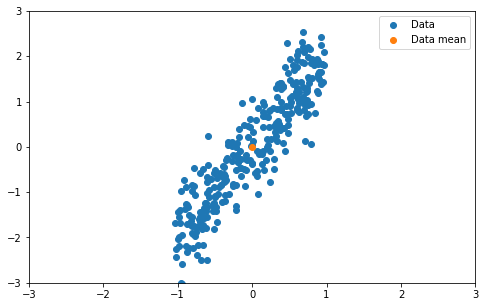

In [ ]:
plt.figure(figsize=(8, 5))
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.scatter(X20[0],X20[1],label='Data')
plt.scatter(m20[0],m20[1],label='Data mean')
plt.legend()
plt.show()

In [ ]:
# Standardization
X_std = np.copy(X20)
std = np.std(X20,axis = 1)
X_std[0,:] = X20[0,:]/std[0]
X_std[1,:] = X20[1,:]/std[1]

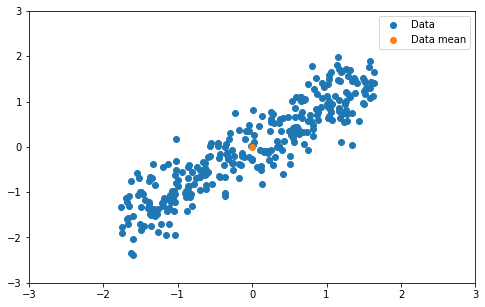

In [ ]:
plt.figure(figsize=(8, 5))
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.scatter(X_std[0],X_std[1],label='Data')
plt.scatter(m20[0],m20[1],label='Data mean')
plt.legend()
plt.show()

In [ ]:
# Correlation
rho = np.corrcoef(X_std)
rho

array([[1.        , 0.91373796],
       [0.91373796, 1.        ]])

In [ ]:
# Cov
n = len(y1)
S2 = (1/(n-1))*X_std@X_std.T
S2

array([[1.00334448, 0.91679394],
       [0.91679394, 1.00334448]])

In [ ]:
# Eigendecomposition
V2, P2 = eig(S2)
B2 = P2.T
B2

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [ ]:
V2[0]/np.sum(V2)

0.956868982481355

In [ ]:
Re0 = np.outer(P2[0,:],P2[0,:])@X_std # PC1
Re1 = np.outer(P2[1,:],P2[1,:])@X_std # PC2

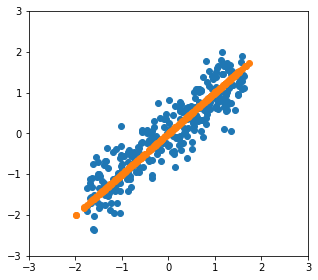

In [ ]:
plt.figure(figsize=(5, 4.5))
plt.xlim([-3,3])
plt.ylim([-3,3])
#plt.scatter(y1,y2)
plt.scatter(X_std[0],X_std[1])
plt.scatter(Re0[0],Re0[1])
plt.show()

In [ ]:
# Reconstruction



In [ ]:
Xr0 = np.copy(Re0)
Xr1 = np.copy(Re1)
Xr0[0,:] = std[0]*Re0[0,:] + m[0]
Xr0[1,:] = std[1]*Re0[1,:] + m[1]

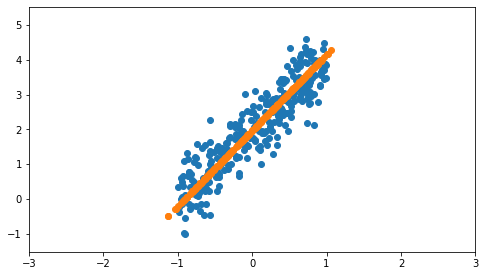

In [ ]:
plt.figure(figsize=(8, 4.5))
plt.xlim([-3,3])
plt.ylim([-1.5,5.5])
plt.scatter(y1,y2)
plt.scatter(Xr0[0],Xr0[1])
#plt.scatter(Xr1[0],Xr1[1])
plt.show()

In [ ]:
Z = P2[0,:]@X_std # Use PC1
Xhat = np.outer(P2[0,:],P2[0,:])@X_std
X_std.shape, Xhat.shape, Z.shape

((2, 300), (2, 300), (300,))

In [ ]:
# PCA and eigenfaces
# 1. Prepare the data with each row representing an image.
# 2. Subtract the mean image from the data.
# 3. Calculate the eigenvectors and eigenvalues of the covariance matrix 
# (or of its transpose).
# 4. Find the optimal transformation matrix by selecting the 
# principal components (eigenvectors with largest eigenvalues).
# 5. Project the centered data into the subspace.
# 6. New faces can then be projected into the linear subspace and the nearest 
# neighbour to a set of projected training images is found.
import sklearn.datasets
download = sklearn.datasets.fetch_olivetti_faces()
Faces = download['data'].T
Faces.shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


(4096, 400)

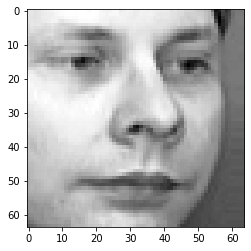

In [ ]:
plt.imshow(Faces[:,39].reshape((64, 64)), cmap='gray')

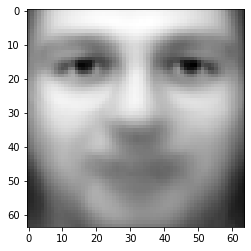

In [ ]:
# Mean face
F = Faces[:,0:380]
D, N = F.shape
mean_face = np.mean(F,axis = 1)
std = np.std(F,axis = 1)
plt.imshow(mean_face.reshape((64, 64)), cmap='gray')

In [ ]:
# Step1. Subtract the mean, standardize
X = np.copy(F)
for i in range(N):
  X[:,i] = (F[:,i] - mean_face)/std

np.std(X,axis = 1)

array([0.9999999, 1.0000001, 0.9999999, ..., 1.       , 1.       ,
       0.9999998], dtype=float32)

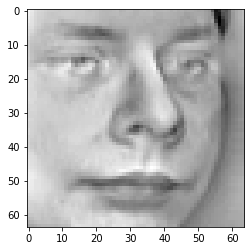

In [ ]:
plt.imshow(X[:,39].reshape((64, 64)), cmap='gray')

In [ ]:
# Step 2. Compute Covariance matrix and eigendecomposition
C = np.cov(X.T)
C.shape

(380, 380)

In [ ]:
# Eigenvector as eigenfaces
GTR, VTR = eig(C)
VTR.shape

(380, 380)

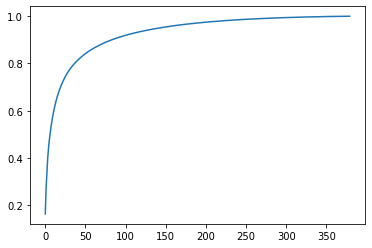

In [ ]:
p = np.cumsum(GTR)/np.sum(GTR)
plt.plot(p)

In [ ]:
# Find number of PCs
M = 0
threshold = 0.99
while np.sum(GTR[0:M])/np.sum(GTR) < threshold:
  M += 1
M, np.sum(GTR[0:M])/np.sum(GTR)

(269, 0.9900913515894247)

In [ ]:
# Compute PCs (eigenvectors of X_zero@X_zero.T), stored as PCs
PCs = X@VTR[0:M,:].T
# Normalize to unit vectors
for i in range(M):
  PCs[:,i] = PCs[:,i]/np.linalg.norm(PCs[:,i])
np.linalg.norm(PCs[:,0])

1.0

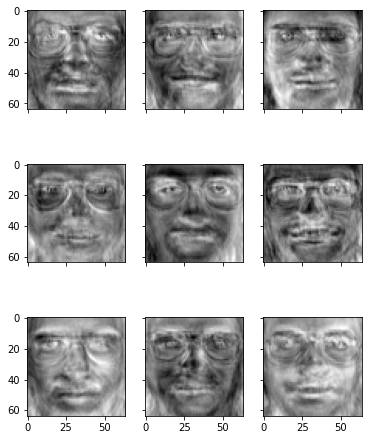

In [ ]:
# Print some Eigenfaces, eigenface = PCs[:,i]
#plt.imshow(eigenface.reshape((64,64)), cmap='gray')
fig, axes = plt.subplots(3,3,sharex=True,sharey=True,figsize=(6,8))
for i in range(0,9):
    axes[i%3][i//3].imshow(PCs[:,i].reshape(64,64), cmap="gray")
plt.show()

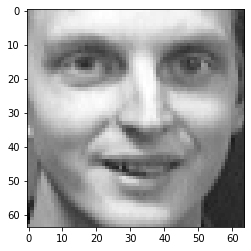

In [ ]:
# kNN to classify based on Euclidean distance
test_face = Faces[:,397]
plt.imshow(test_face.reshape((64,64)),cmap = 'gray')

In [ ]:
# Standardize
unknown_face = (test_face - mean_face)/std
# Project onto new space spanned by PCs
Z =  PCs.T@X
unknown_z = PCs.T@unknown_face
d = np.linalg.norm(Z[:,0]-unknown_z)
k = 0
for i in range(1,N):
  if np.linalg.norm(Z[:,i]-unknown_z) < d:
    k = i
    d = np.linalg.norm(Z[:,i]-unknown_z)
k

20

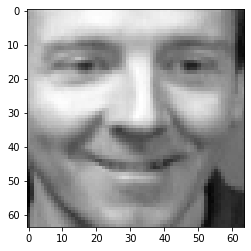

In [ ]:
# Show images
#plt.imshow(unknown_face.reshape((64,64)),cmap = 'gray')
plt.imshow(Faces[:,k].reshape((64,64)),cmap = 'gray')
plt.show()

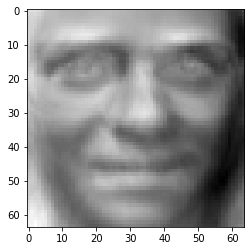

In [ ]:
# Reconstruction
X_re = std*(PCs@unknown_z) + mean_face
plt.imshow(X_re.reshape((64,64)),cmap = 'gray')